# Penguin Species Dataset

![Penguin Image](penguin.jpg)

## About the Dataset

The **Penguin Species Dataset** contains data collected on three species of penguins (Adelie, Chinstrap, and Gentoo) observed on three islands in the Palmer Archipelago, Antarctica. The dataset includes several features such as:

- **Bill Length (mm)**: The length of the penguin's bill.
- **Bill Depth (mm)**: The depth (thickness) of the penguin's bill.
- **Flipper Length (mm)**: The length of the penguin's flipper.
- **Body Mass (g)**: The body mass of the penguin in grams.
- **Species**: The species of the penguin.
- **Sex**: The gender of the penguin.
- **Year**: The year the data was collected.

This dataset is widely used for classification and exploratory data analysis to understand differences between penguin species and their ecological characteristics.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('penguins.csv')
df.head()

id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [2]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [3]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
df.shape

(344, 9)

### In penguins, the "bill" (also referred to as the beak) is an important body feature that is used for feeding, communication, and sometimes thermoregulation. It has several measurable dimensions:

    Bill Length (bill_length_mm): This refers to the distance from the tip of the penguin’s beak to the point where the beak meets the head. It is typically measured in millimeters.

    Bill Depth (bill_depth_mm): This refers to the vertical thickness of the penguin’s bill, usually measured at the base of the beak, also in millimeters.

These measurements are often used to differentiate between species of penguins and can also provide insights into their diet and ecological behavior. For example, penguins with longer and thinner bills may feed on different types of prey compared to those with shorter, thicker bills.

In [6]:
# Lets assume we want to group the by 'species'
grouping_column = 'species'

# List of numerical columns with missing values
ncolumns_to_fill = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Filling NaN values with median of respective ggrouping_column
for col in ncolumns_to_fill:
    df[col] = df.groupby(grouping_column)[col].transform(lambda x: x.fillna(x.median()))

# Distribution of data in all ccolumns_to_fill
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
df.nunique()

id                   344
species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

In [8]:
df.describe()

id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      344.000000     344.000000         344.000000   
mean   171.500000       43.916860      17.148547         200.927326   
std     99.448479        5.453713       1.973601          14.056652   
min      0.000000       32.100000      13.100000         172.000000   
25%     85.750000       39.200000      15.575000         190.000000   
50%    171.500000       44.450000      17.300000         197.000000   
75%    257.250000       48.500000      18.700000         213.250000   
max    343.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   344.000000   344.000000  
mean   4202.616279  2008.029070  
std     801.231551     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4756.250000  2009.000000  
max    6300.000000  2009.000000

In [9]:
df.head()

id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen            38.8           18.4              190.0   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3       3700.0     NaN  2007  
4       3450.0  female  2007

In [10]:
df.drop(columns = 'id', axis=1, inplace = True)

In [11]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 4:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    
    return categorical_features, non_categorical_features, discrete_features, continuous_features

categorical, non_categorical, discrete, continuous = classify_features(df)

In [12]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

species
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
sex
male      168
female    165
Name: count, dtype: int64



In [13]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

In [14]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            38.8           18.4              190.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3       3700.0     NaN  2007  
4       3450.0  female  2007

In [15]:
#df.drop(columns = 'id', axis=1, inplace = True)
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            38.8           18.4              190.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3       3700.0     NaN  2007  
4       3450.0  female  2007

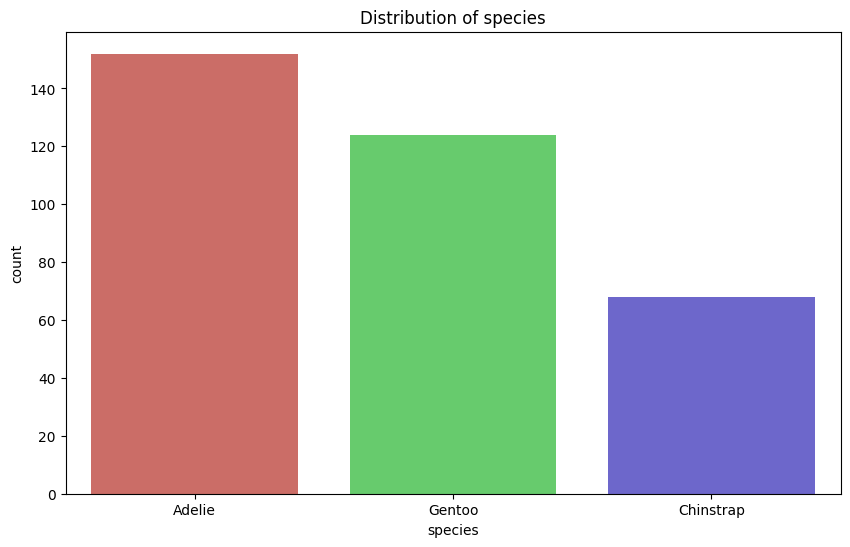

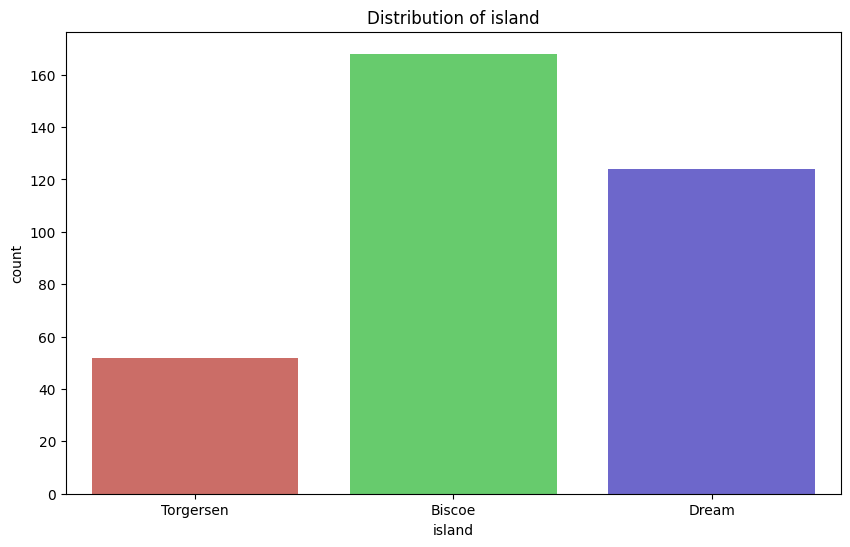

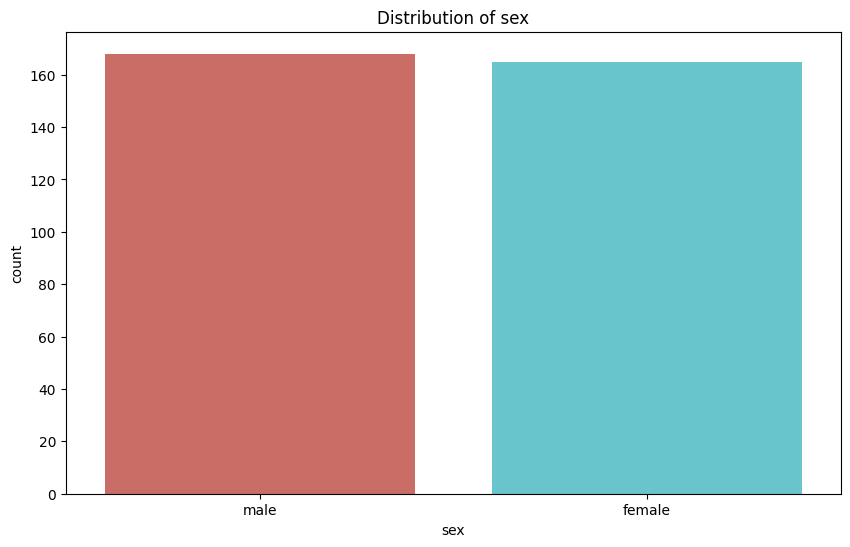

In [16]:
for i in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=i, data=df, palette='hls')
    plt.title(f'Distribution of {i}')
    plt.show()

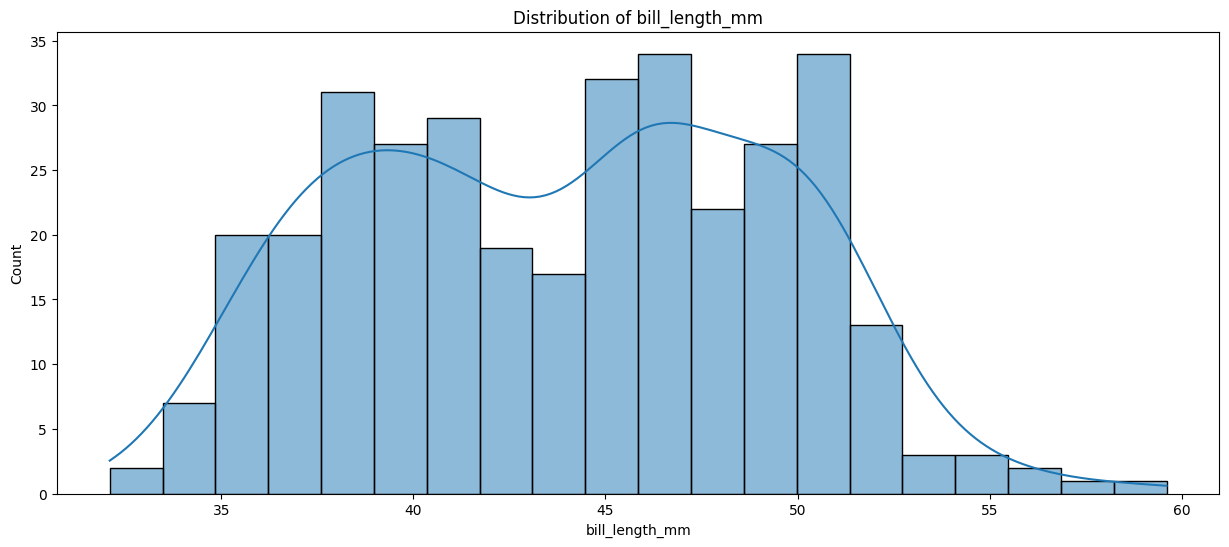

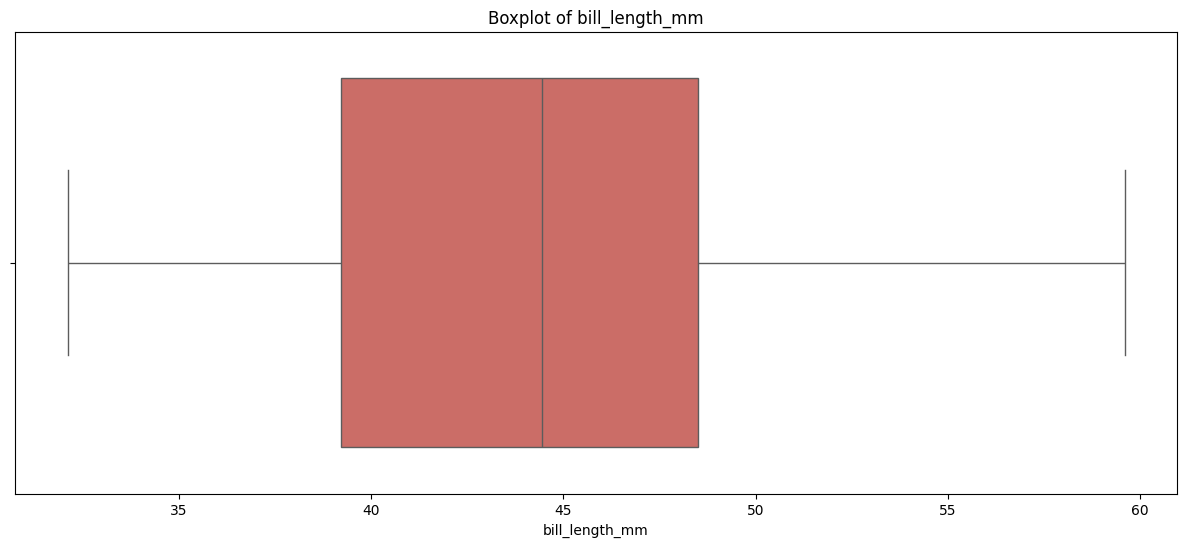

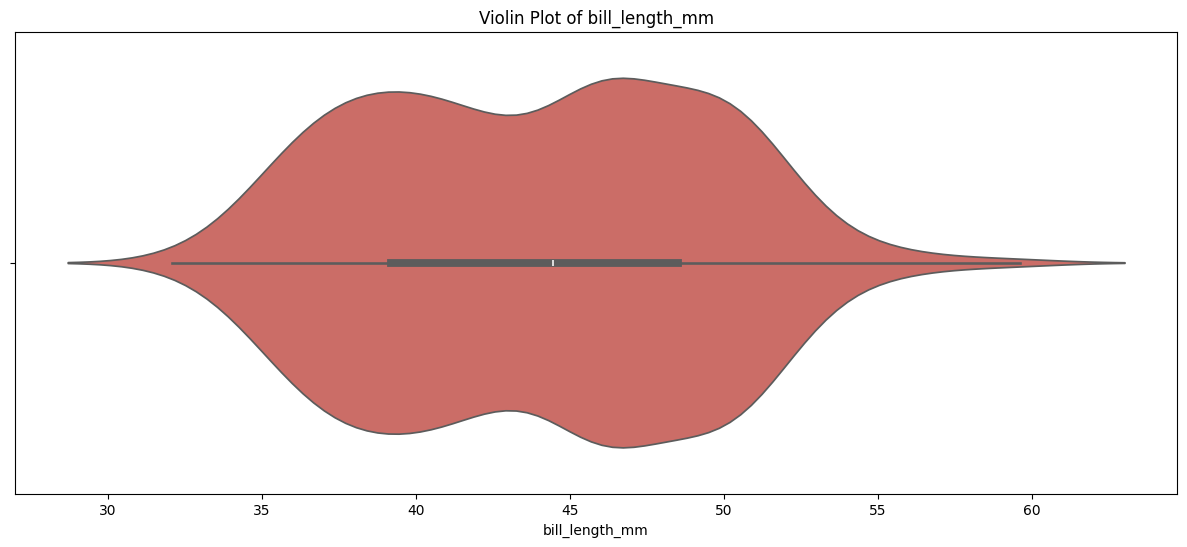

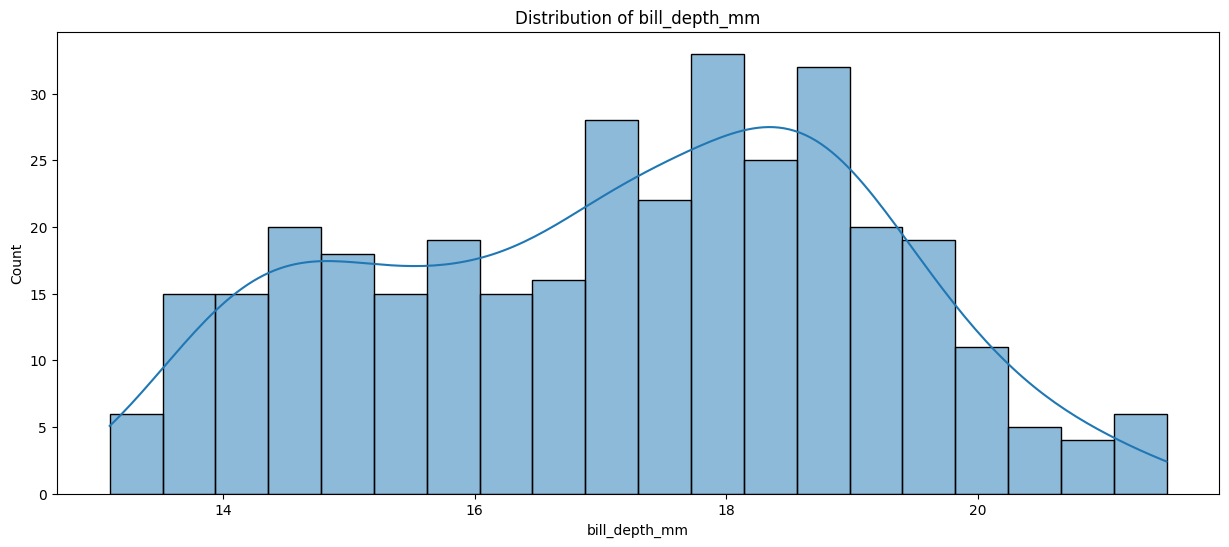

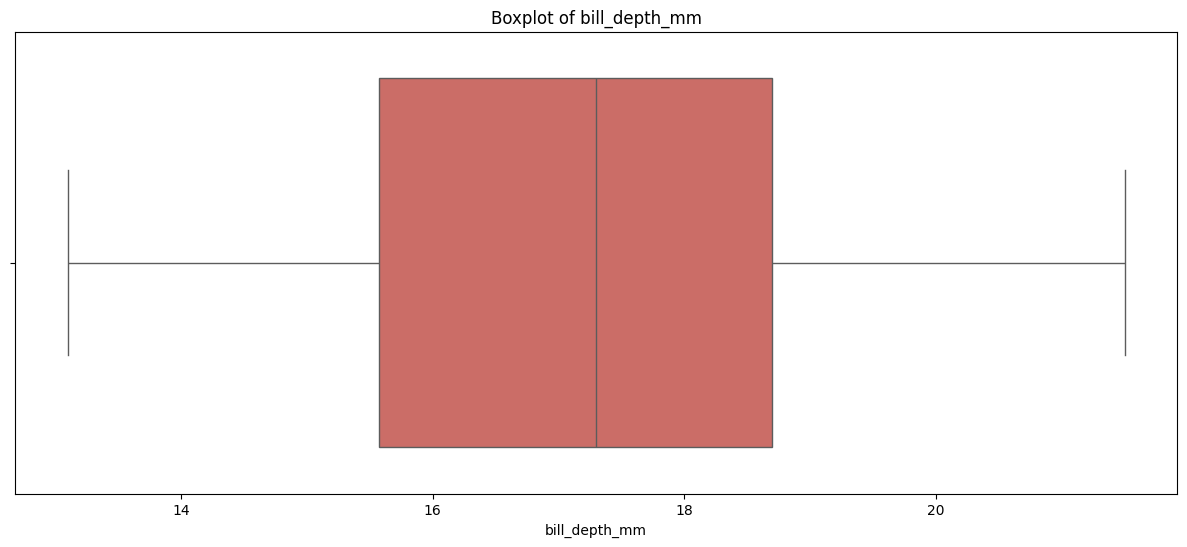

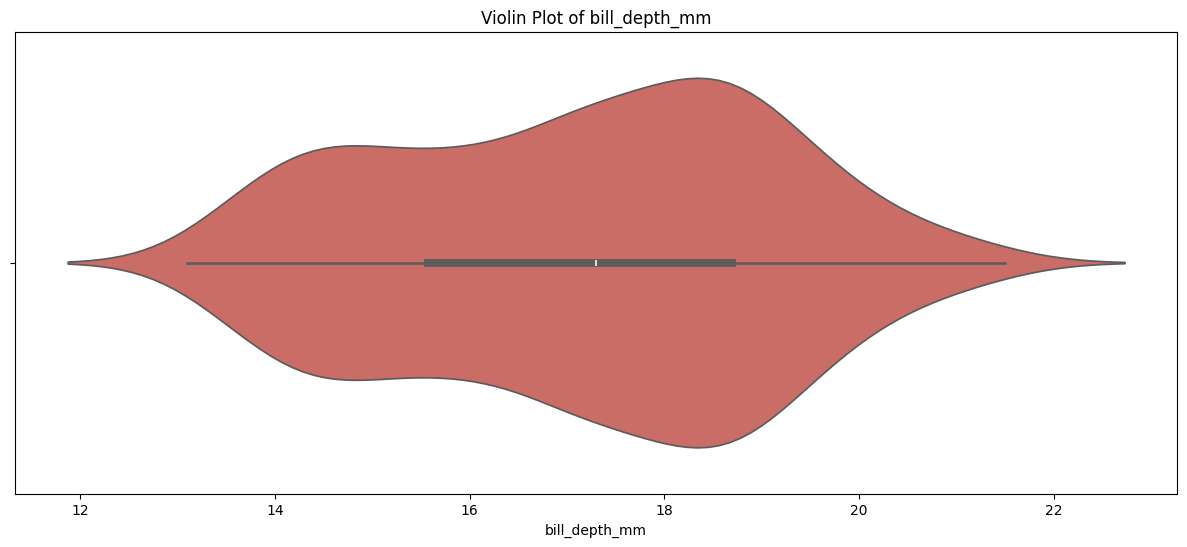

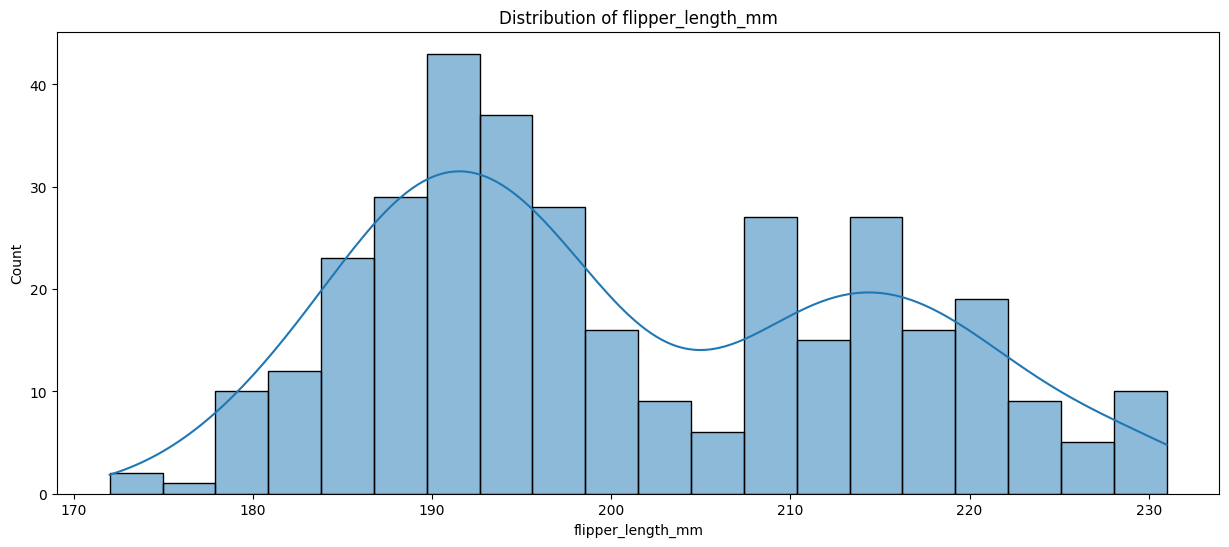

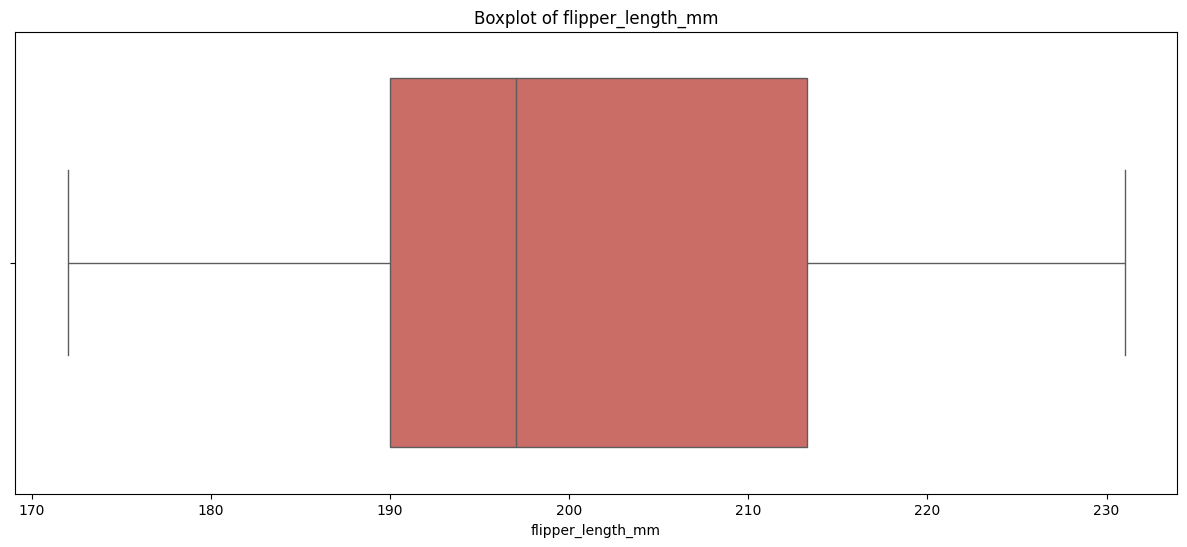

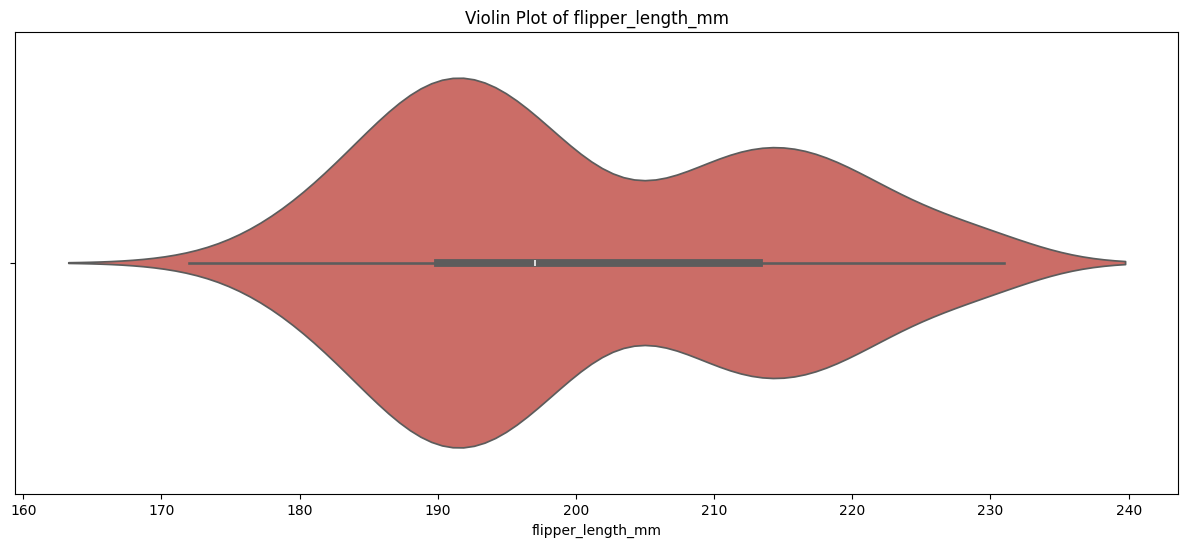

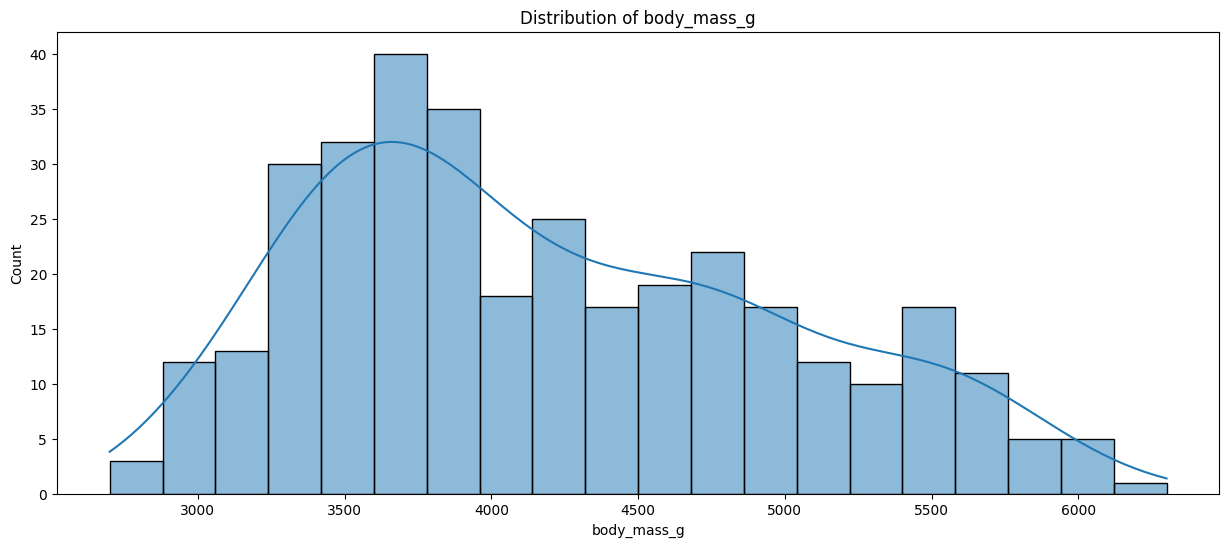

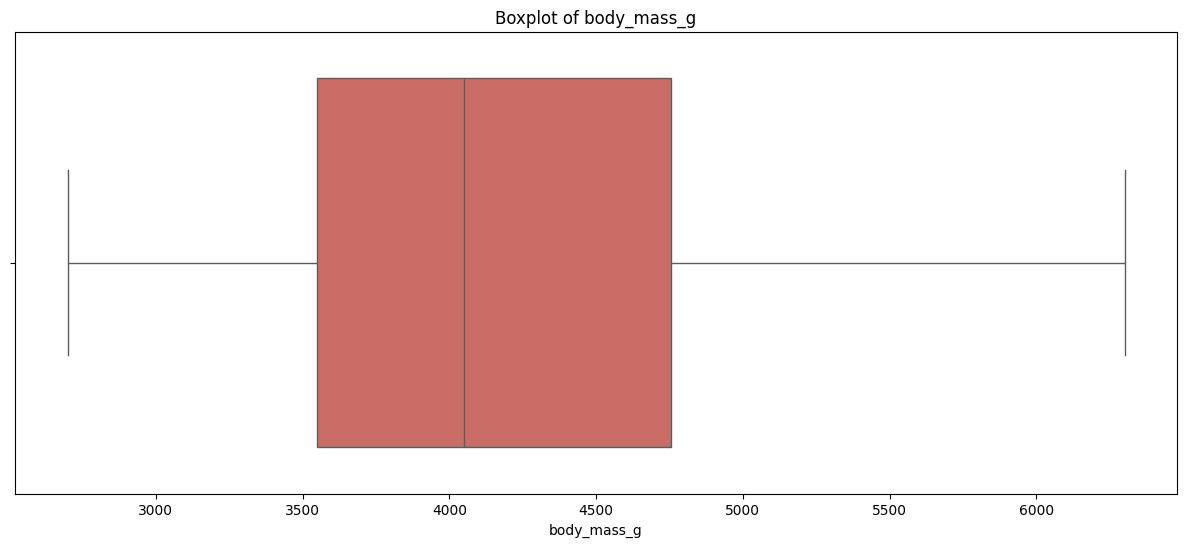

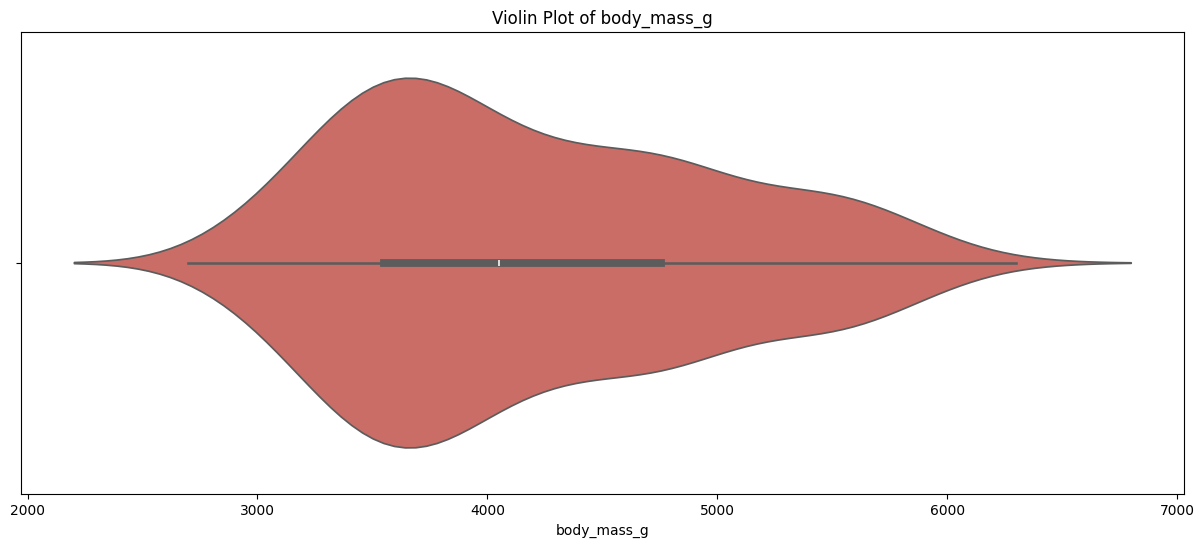

In [17]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[i], bins=20, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.title(f'Boxplot of {i}')
    plt.show()

    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.title(f'Violin Plot of {i}')
    plt.show()

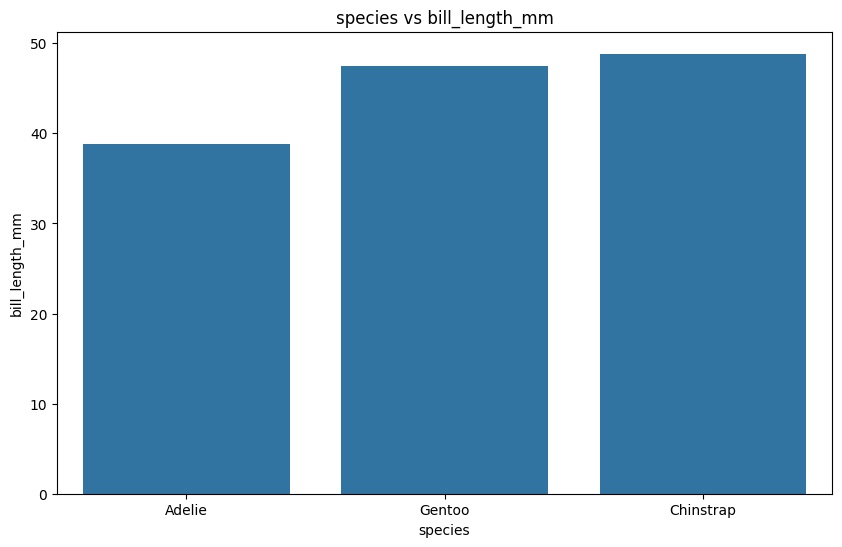

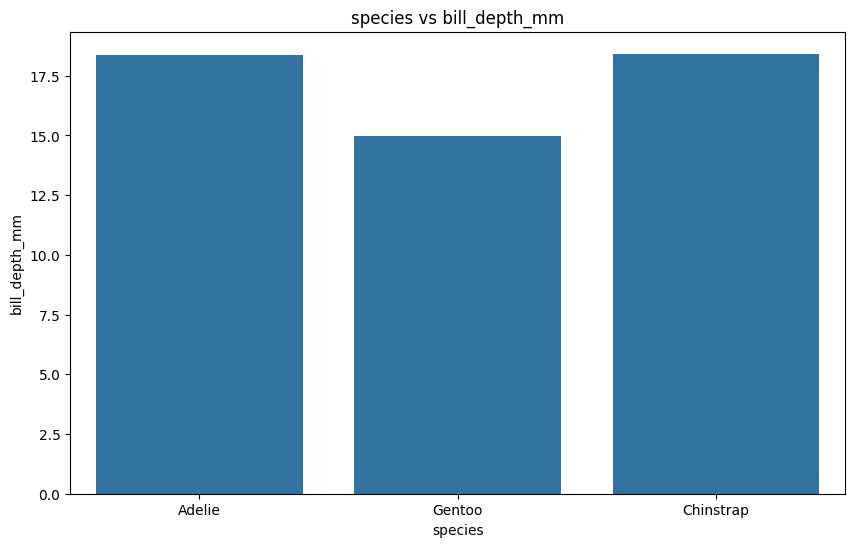

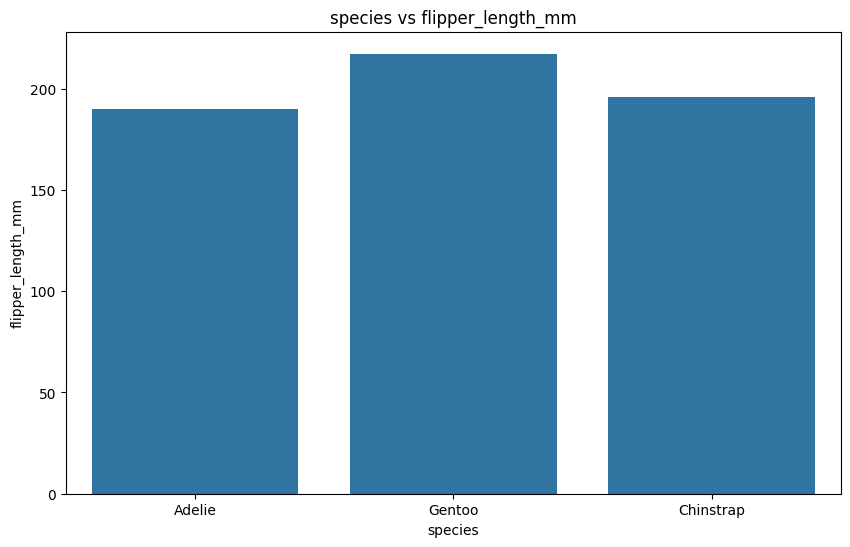

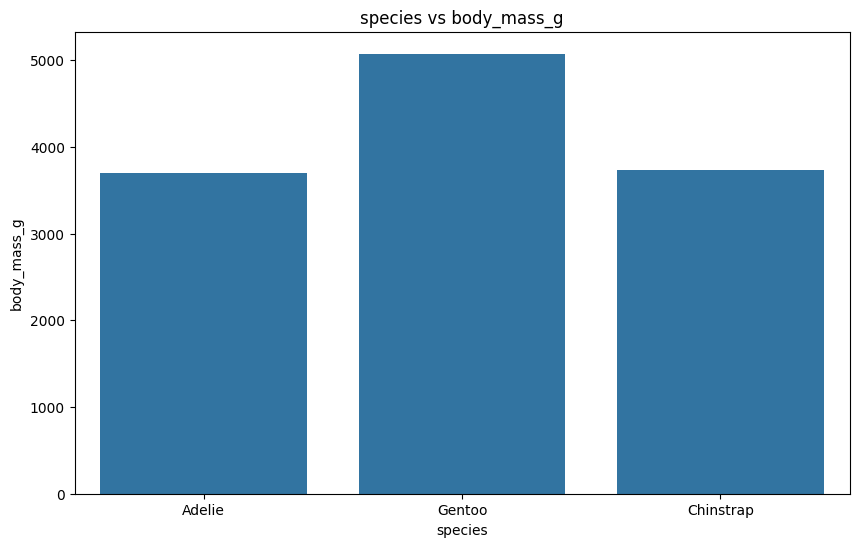

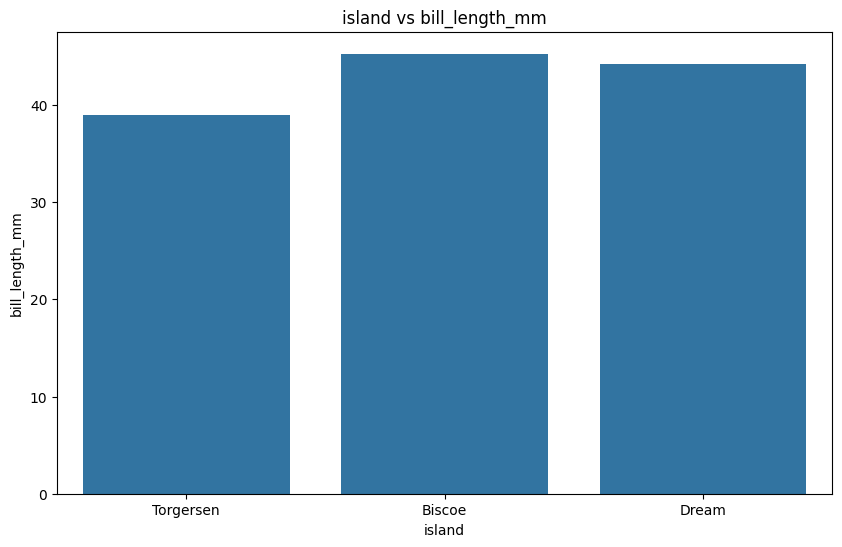

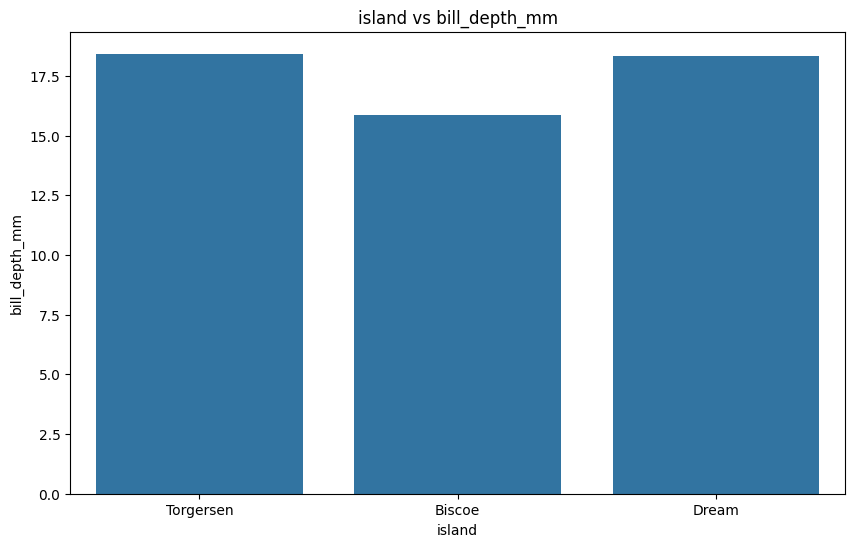

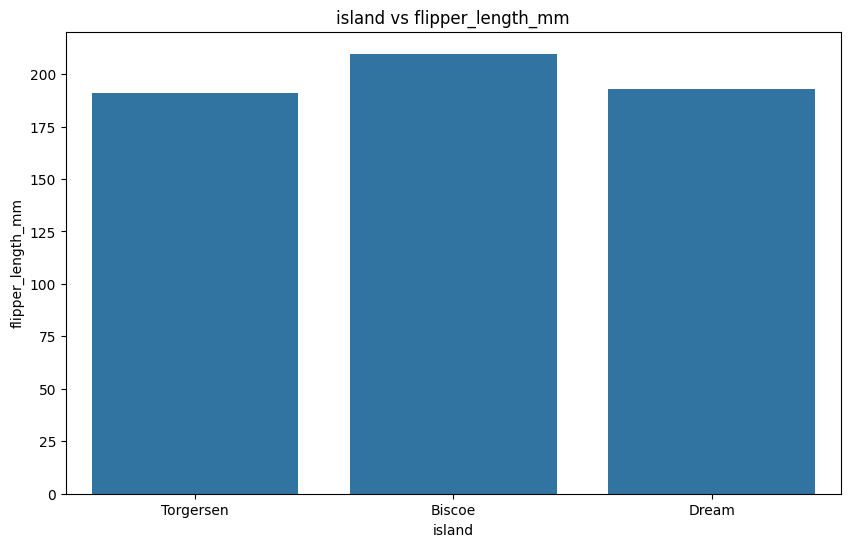

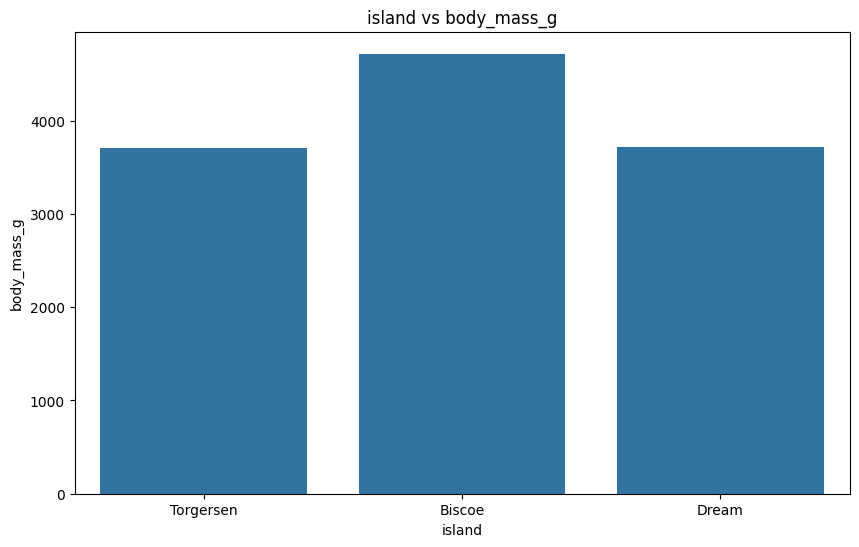

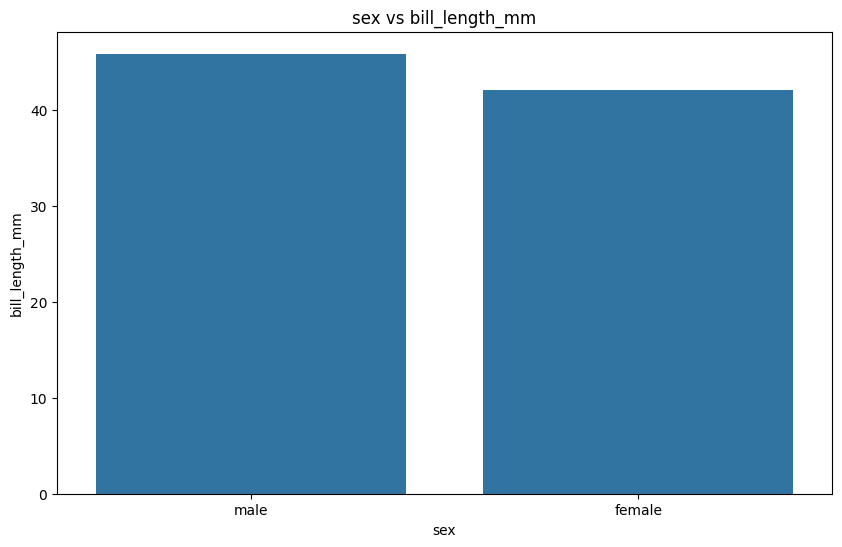

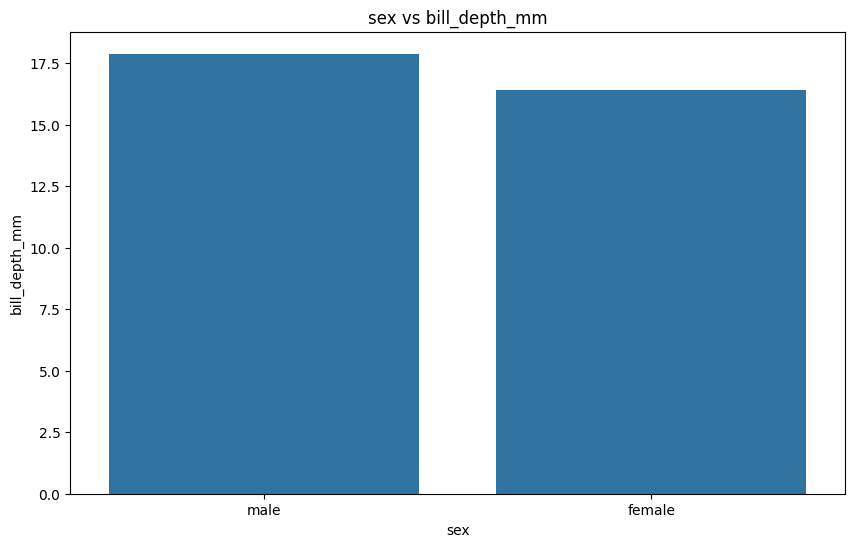

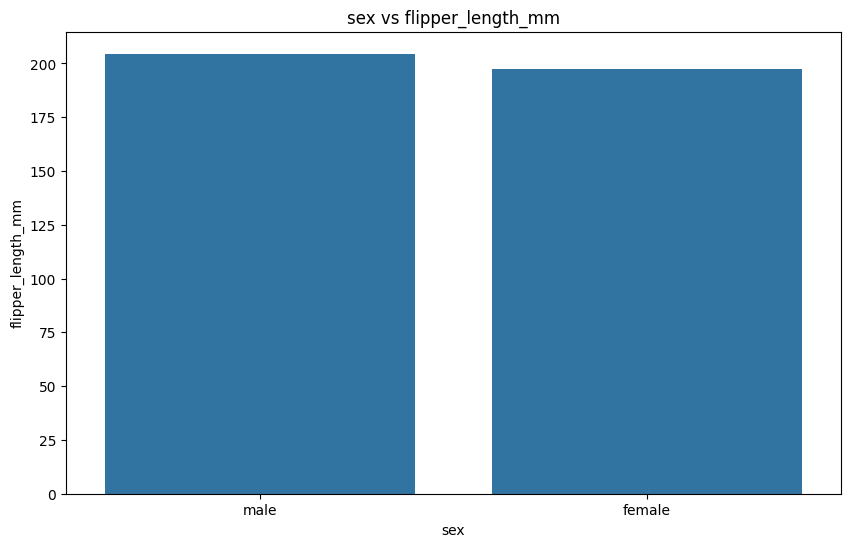

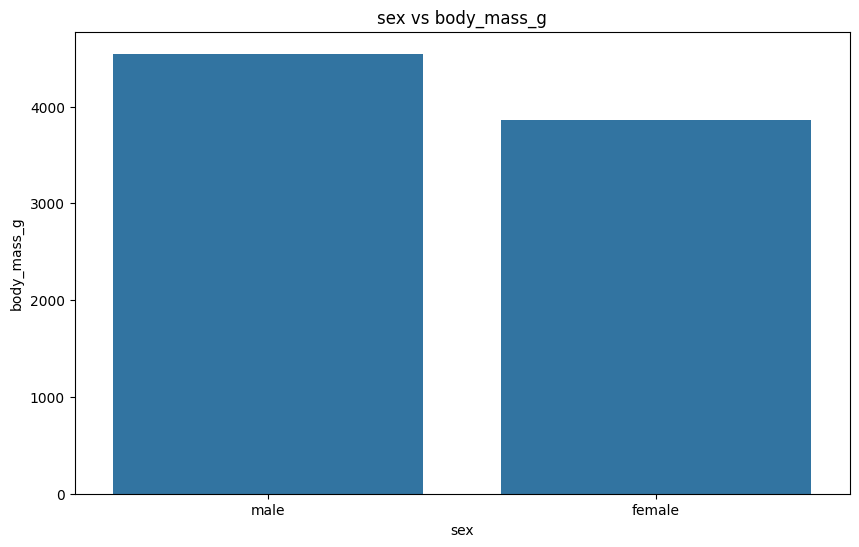

In [18]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=dis, y=cont, data=df, ci=None)
        plt.title(f'{dis} vs {cont}')
        plt.show()

In [19]:
continuous

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

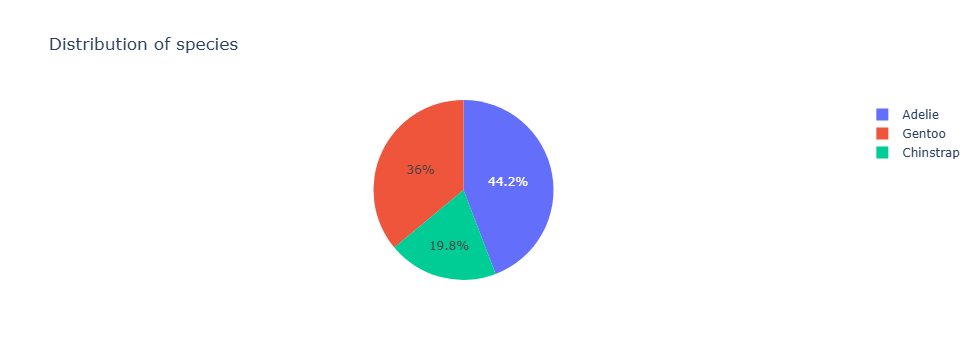

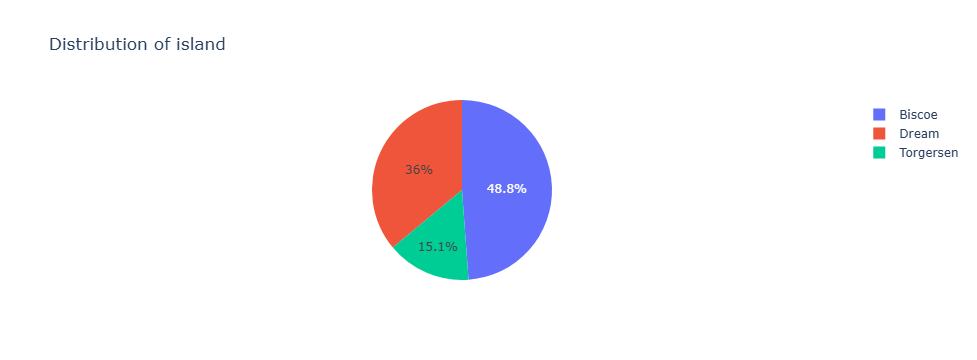

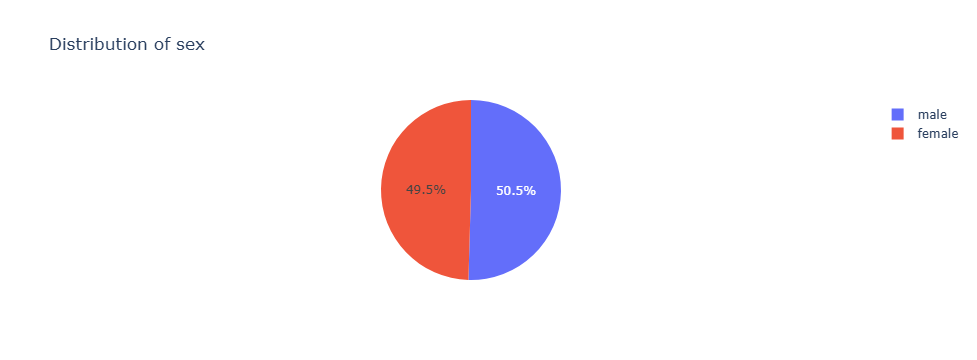

In [20]:
import plotly.express as px
for i in categorical:
 counts = df[i].value_counts()
 fig = px.pie(counts, values=counts.values, names=counts.index, 
title=f'Distribution of {i}')
 fig.show()

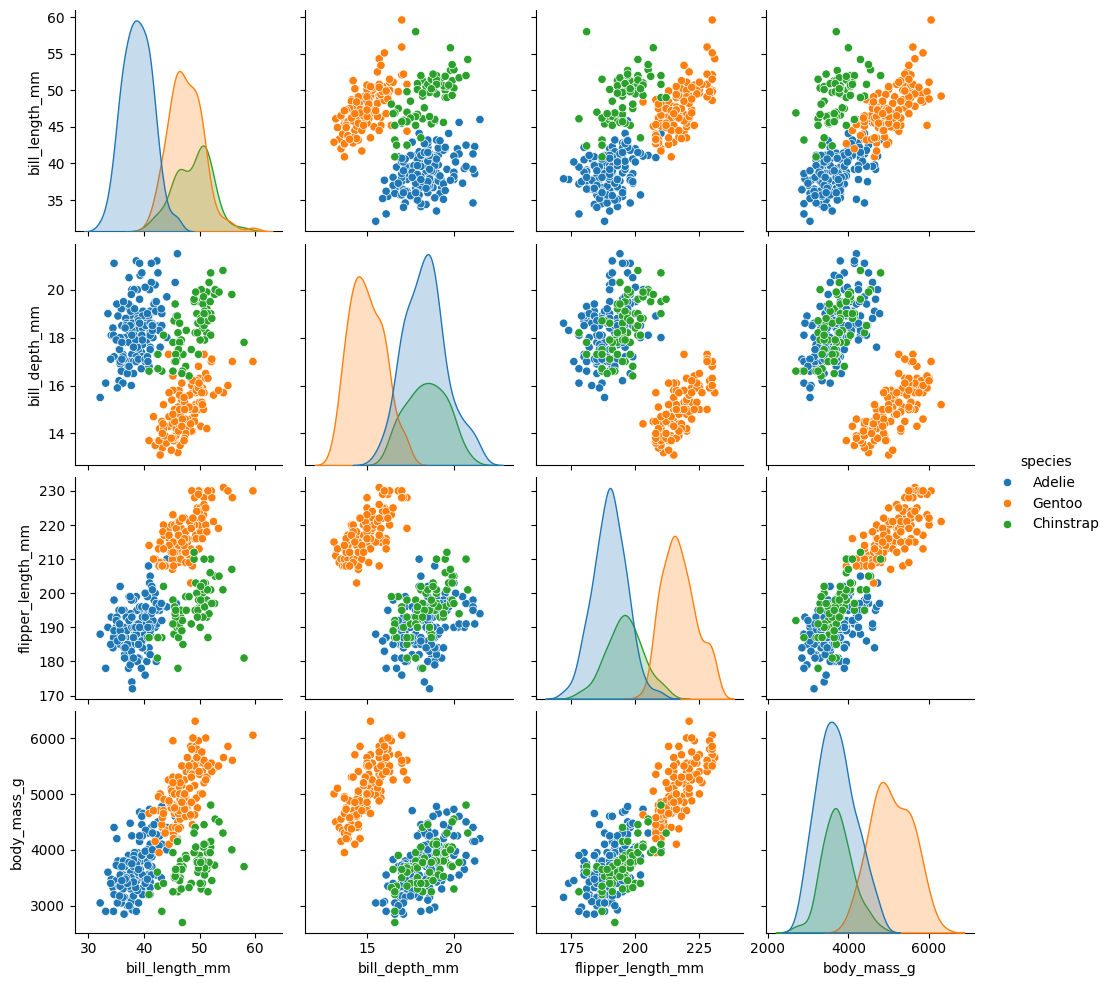

In [21]:
sns.pairplot(df, hue='species', vars=continuous)
plt.show()

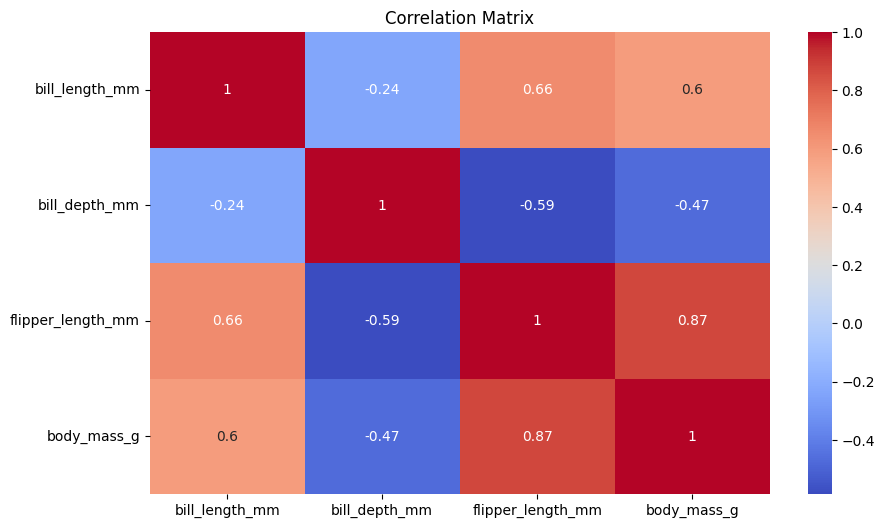

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

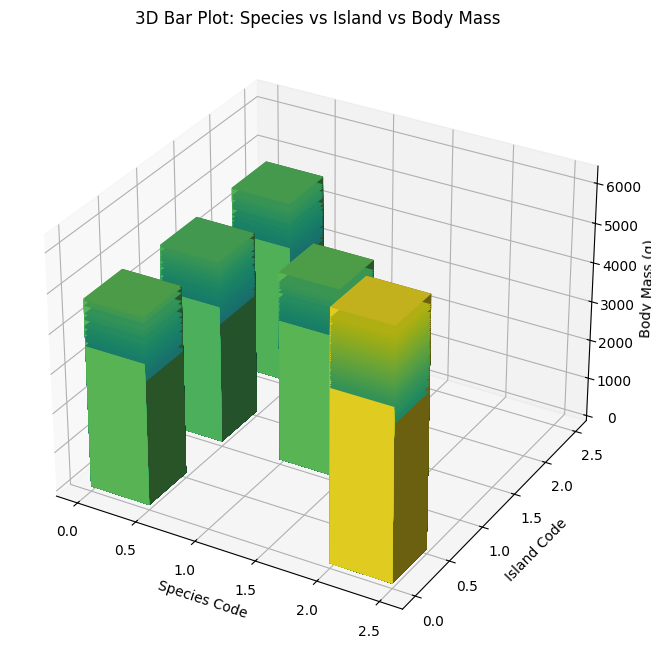

In [23]:
from mpl_toolkits.mplot3d import Axes3D

df['species_code'] = df['species'].astype('category').cat.codes
df['island_code'] = df['island'].astype('category').cat.codes

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = df['species_code']
y = df['island_code']
z = np.zeros(len(df))
dx = dy = 0.5
dz = df['body_mass_g']
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=plt.cm.viridis(df['body_mass_g'] / max(df['body_mass_g'])))
ax.set_xlabel('Species Code')
ax.set_ylabel('Island Code')
ax.set_zlabel('Body Mass (g)')
plt.title('3D Bar Plot: Species vs Island vs Body Mass')
plt.show()